In [1]:
import numpy as np
import pandas as pd
import openpyxl
import matplotlib as mp
import matplotlib.pyplot as plt
import sklearn as sl
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Lasso
import xgboost as xg
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import math

In [2]:
AA="C:/Users/ganes/onedrive/Desktop/AI/DMFC/JMC-Data.xlsx"
df=pd.read_excel(AA)
df.head(5)
df=pd.read_excel(AA)
df.head(5)
df.shape

(364, 36)

In [3]:
A=df['GP']
B=df["GE"]
C = df['CQD']
D = df['SWNT']
E = df["MWNT"]
F=df['CNF']
G=df["MC"]
H = df['CB']
I = df['N2']
J=df['SU']
K=df["CuO"]
L = df['CeO2']
M=df['MnO2']
N= df['MoO3']
O= df['Mn3O4']
P=df["WO3"]
Q=df["Au"]
R=df["Co"]
S=df["Cu"]
T=df["Fe"]
U=df["Ir"]
V=df['Ni']
W= df['Pd']
X= df['Pt']
Y=df["Ru"]
Z=df["SnO2"]
AA=df["TiO2"]
BB=df["Zn"]
CC=df["HPMO"]
DD=df['HSO']
EE= df['HClO']
FF= df['OH']
GG=df["MEOH"]
HH=df["SR"]
List = [A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W, X,Y,Z,AA,BB,CC,DD,EE,FF,GG,HH]
List1=pd.concat(List, axis=1, sort=True)
List1.head(5)
List1.shape


(364, 34)

In [4]:
from sklearn import preprocessing
AB = preprocessing.MinMaxScaler()
BC=AB.fit_transform(List1)
CD=pd.DataFrame(BC, columns=List1.columns[:])
CD.head(5)

,GP,GE,CQD,SWNT,MWNT,CNF,MC,CB,N2,SU,...,Ru,SnO2,TiO2,Zn,HPMO,HSO,HClO,OH,MEOH,SR
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.606061,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.473684,0.242424
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.606061,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.473684,0.242424
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.606061,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.473684,0.242424
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.606061,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.473684,0.242424
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.606061,0.0,0.0,...,0.56,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.473684,0.090909


In [5]:
import seaborn as sns

In [6]:
X = List1
Y=  df['MA']
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y, test_size=0.2, random_state=42)

220.83257318259052
367.5284115632093
0.8775520813060581
0.8417493191184267
RandomForestRegressor(min_samples_leaf=3, min_samples_split=3, n_estimators=43,
                      random_state=42)


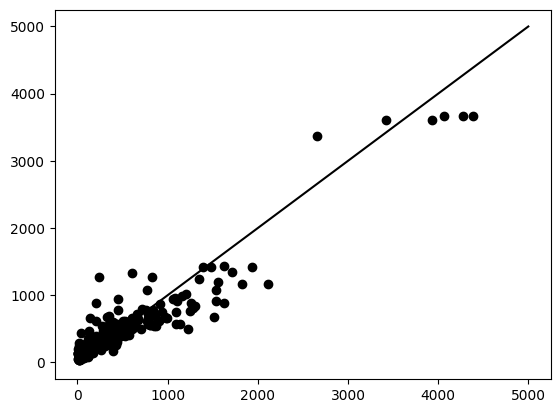

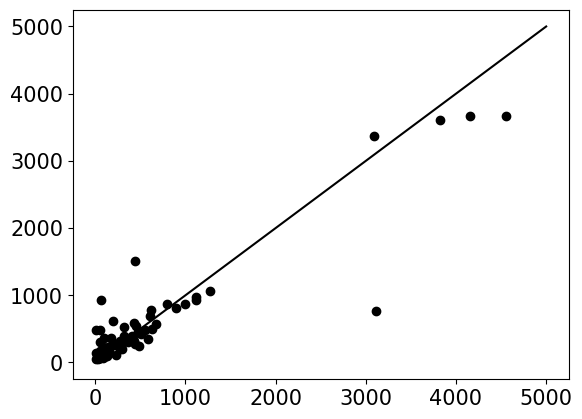

In [7]:
import math 
hyper_params_rdf = {'n_estimators':np.arange(1, 400, 1), 
                   } 
                    
np.random.seed(22)
RF=RandomForestRegressor(random_state=42, min_samples_split=3, min_samples_leaf=3 )
g_search_RF = RandomizedSearchCV(RF, hyper_params_rdf, cv=10, n_jobs=-1, )
rf_model=g_search_RF.fit(X_Train,Y_Train)
predict_rf_train=g_search_RF.predict(X_Train)
predict_rf_test=g_search_RF.predict(X_Test)
mse_rf_test = mean_squared_error(Y_Test, predict_rf_test)
mse_rf_train = mean_squared_error(Y_Train,predict_rf_train)
print(math.sqrt(mse_rf_train))
print(math.sqrt(mse_rf_test))
r2_rf_train = r2_score(Y_Train, predict_rf_train)
r2_rf_test = r2_score(Y_Test, predict_rf_test)
print( r2_rf_train)
print(r2_rf_test)
print(g_search_RF.best_estimator_)
plt.scatter(Y_Train, predict_rf_train, marker='o', alpha=1, color="black")
plt.plot([-0, 5000], [-0, 5000], color="black")
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)
plt.show()
plt.scatter(Y_Test, predict_rf_test, marker='o', alpha=1, color="black")
plt.plot([-0, 5000], [-0, 5000], color="black")
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)
plt.show()

219.0121660838753
354.330871751827
0.8795625303219217
0.8529104777013755
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=6, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=344, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)


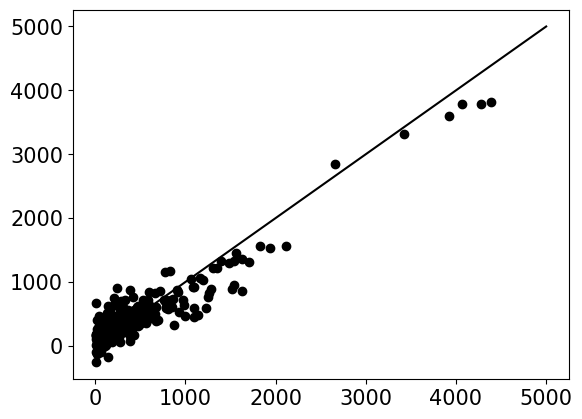

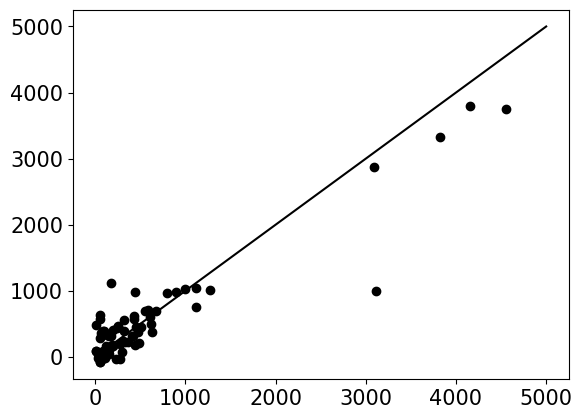

In [9]:
hyper_params_xgb = {'n_estimators':np.arange(1, 400, 1), 
                   }                  
np.random.seed(22)
xgb=xg.XGBRegressor(random_state=42, max_depth=3, colsample_bytree=0.6, min_child_weight=6, subsample=0.4, learning_rate=0.05  )
g_search_xgb = RandomizedSearchCV(xgb, hyper_params_xgb, cv=10, n_jobs=-1)
g_search_xgb.fit(X_Train, Y_Train);
predict_xg_train = g_search_xgb.predict(X_Train)
predict_xg_test = g_search_xgb.predict(X_Test)
mse_xg_test = mean_squared_error(Y_Test,predict_xg_test)
mse_xg_train = mean_squared_error(Y_Train,predict_xg_train)
print(math.sqrt(mse_xg_train))
print(math.sqrt(mse_xg_test))
r2_xg_train = r2_score(Y_Train,predict_xg_train)
r2_xg_test = r2_score(Y_Test,predict_xg_test)
print(r2_xg_train)
print(r2_xg_test)
print(g_search_xgb.best_estimator_)
plt.scatter(Y_Train,predict_xg_train, marker='o', alpha=1, color="black")
plt.plot([-0, 5000], [-0, 5000], color="black")
plt.show()
plt.scatter(Y_Test,predict_xg_test, marker='o', alpha=1, color="black")
plt.plot([-0, 5000], [-0, 5000], color="black")
plt.show()

244.18738160495943
377.2336069744752
0.8502828409157234
0.8332812273340837
GradientBoostingRegressor(learning_rate=0.01, n_estimators=344, random_state=42)


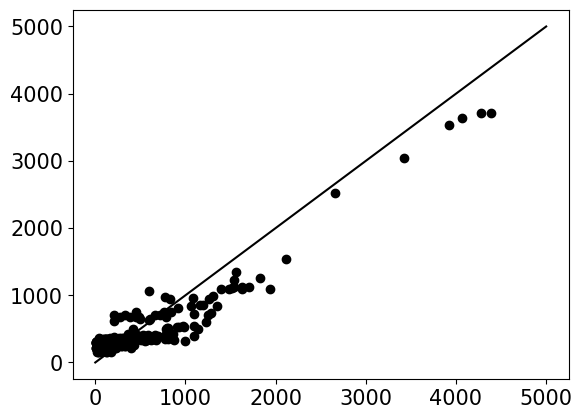

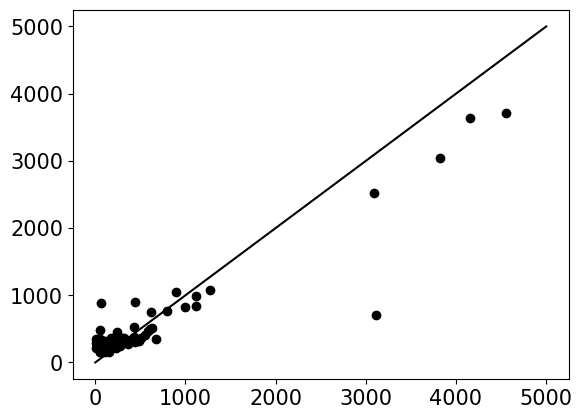

In [10]:
hyper_params_GBR = {"n_estimators":np.arange(1, 400, 1),}
np.random.seed(22)
GB= GradientBoostingRegressor(random_state=42, learning_rate=0.01,  )
g_search_GB = RandomizedSearchCV(GB, hyper_params_GBR, cv=10, n_jobs=-1)
g_search_GB.fit(X_Train, Y_Train);
predict_GB_train = g_search_GB.predict(X_Train)
predict_GB_test = g_search_GB.predict(X_Test)
mse_GB_test = mean_squared_error(Y_Test,predict_GB_test)
mse_GB_train = mean_squared_error(Y_Train,predict_GB_train)
print(math.sqrt(mse_GB_train))
print(math.sqrt(mse_GB_test))
r2_GB_train = r2_score(Y_Train,predict_GB_train)
r2_GB_test = r2_score(Y_Test,predict_GB_test)
print(r2_GB_train)
print(r2_GB_test)
print(g_search_GB.best_estimator_)
plt.scatter(Y_Train,predict_GB_train, marker='o', alpha=1, color="black")
plt.plot([-0, 5000], [-0, 5000], color="black")
plt.show()
plt.scatter(Y_Test,predict_GB_test, marker='o', alpha=1, color="black")
plt.plot([-0, 5000], [-0, 5000], color="black")
plt.show()

203.56241484902267
353.67761055013386
0.8959552118692974
0.8534523401788605
ExtraTreesRegressor(min_samples_leaf=3, n_estimators=57, random_state=42)


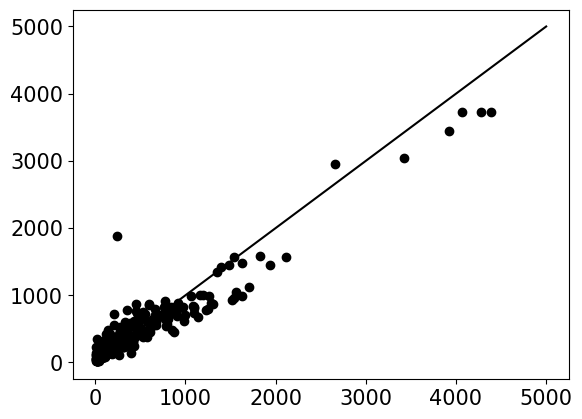

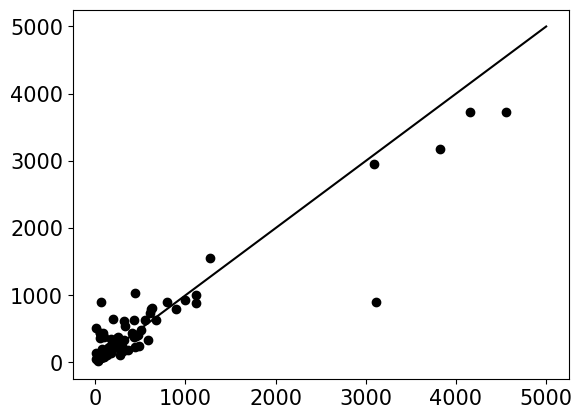

In [106]:
hyper_params_etg = {'n_estimators':np.arange(1, 400, 1),}
np.random.seed(22)
etg_tune = ExtraTreesRegressor(random_state=42,  min_samples_leaf=3,  )
g_search_etg = RandomizedSearchCV(etg_tune, hyper_params_etg, cv=10, n_jobs=-1)
g_search_etg.fit(X_Train, Y_Train);
predict_etg_train = g_search_etg.predict(X_Train)
predict_etg_test = g_search_etg.predict(X_Test)
mse_etg_test = mean_squared_error(Y_Test,predict_etg_test)
mse_etg_train = mean_squared_error(Y_Train,predict_etg_train)
print(math.sqrt(mse_etg_train))
print(math.sqrt(mse_etg_test))
r2_etg_train = r2_score(Y_Train,predict_etg_train)
r2_etg_test = r2_score(Y_Test,predict_etg_test)
print(r2_etg_train)
print(r2_etg_test)
print(g_search_etg.best_estimator_)
plt.scatter(Y_Train, predict_etg_train, marker='o', alpha=1, color="black")
plt.plot([-0, 5000], [-0, 5000], color="black")
plt.show()
plt.scatter(Y_Test,predict_etg_test, marker='o', alpha=1, color="black")
plt.plot([-0, 5000], [-0, 5000], color="black")
plt.show()

181.35073582230723
346.60586423892846
0.917422109231528
0.8592541608723486
DecisionTreeRegressor(max_depth=17, min_samples_leaf=3, random_state=42)


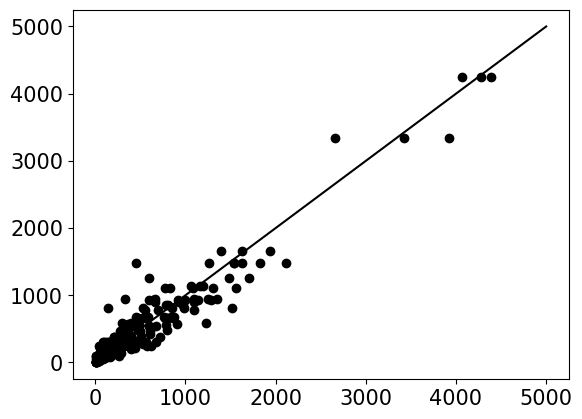

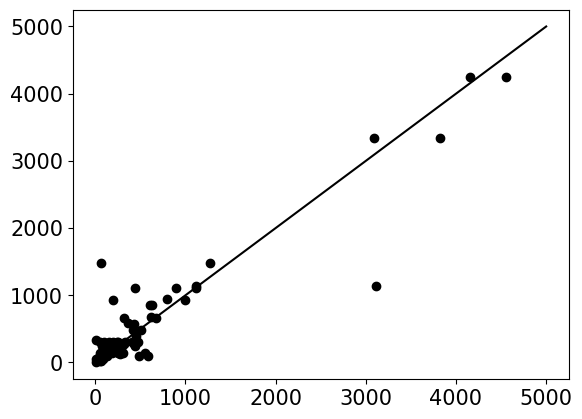

In [121]:
hyper_params_DT = {"min_samples_split":np.arange(2,20,1),
                    "max_depth":np.arange(1,20,1), }
np.random.seed(22)
DT= DecisionTreeRegressor(random_state=42, min_samples_leaf=3 )
g_search_DT = RandomizedSearchCV(DT, hyper_params_DT, cv=10, n_jobs=-1)
g_search_DT.fit(X_Train, Y_Train);
predict_DT_train = g_search_DT.predict(X_Train)
predict_DT_test = g_search_DT.predict(X_Test)
mse_DT_test = mean_squared_error(Y_Test,predict_DT_test)
mse_DT_train = mean_squared_error(Y_Train,predict_DT_train)
print(math.sqrt(mse_DT_train))
print(math.sqrt(mse_DT_test))
r2_DT_train = r2_score(Y_Train,predict_DT_train)
r2_DT_test = r2_score(Y_Test,predict_DT_test)
print(r2_DT_train)
print(r2_DT_test)
print(g_search_DT.best_estimator_)
plt.scatter(Y_Train, predict_DT_train, marker='o', alpha=1, color="black")
plt.plot([-0, 5000], [-0, 5000], color="black")
plt.show()
plt.scatter(Y_Test,predict_DT_test, marker='o', alpha=1, color="black")
plt.plot([-0, 5000], [-0, 5000], color="black")
plt.show()
